Importing all the required libraries

In [0]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Reading data from AirPassengers.csv and loading it onto a Pandas dataframe

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/rahulhegde99/Time-Series-Analysis-and-Forecasting-of-Air-Passengers/master/airpassengers.csv')

Name the field 'Month' to 'ds'(time series) and '#Passengers' to 'y'(data)

In [0]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']

In [4]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Initialise a model and fit our dataframe

In [5]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Make future dataframe rows for 5 from the last available date(we are going the forecast 5 years of data)

In [16]:
future = m.make_future_dataframe(periods=12 * 5, freq='M')
future.tail()

,ds
199,1965-07-31
200,1965-08-31
201,1965-09-30
202,1965-10-31
203,1965-11-30


Predict and display the prediction

In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,722.969367,693.330559,751.544469,656.070375,649.667076,662.832851
200,1965-08-31,676.982507,646.612223,705.922114,659.192995,652.607358,666.195994
201,1965-09-30,639.823788,610.154355,670.814110,662.214886,655.418614,669.433525
202,1965-10-31,610.016940,580.317786,640.204768,665.337506,658.296175,672.689038
203,1965-11-30,639.653367,609.735037,668.731603,668.359396,661.073913,675.903858


Display the prediction on graphs

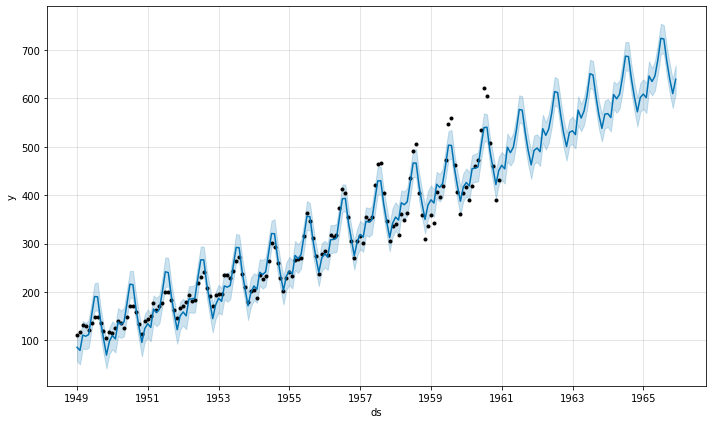

In [18]:
fig1 = m.plot(forecast)

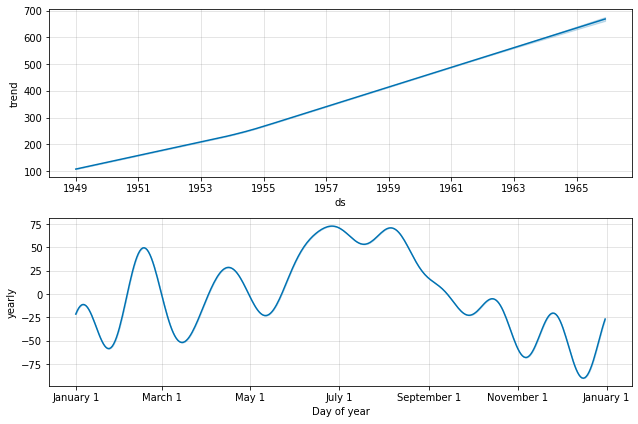

In [19]:
fig2 = m.plot_components(forecast)

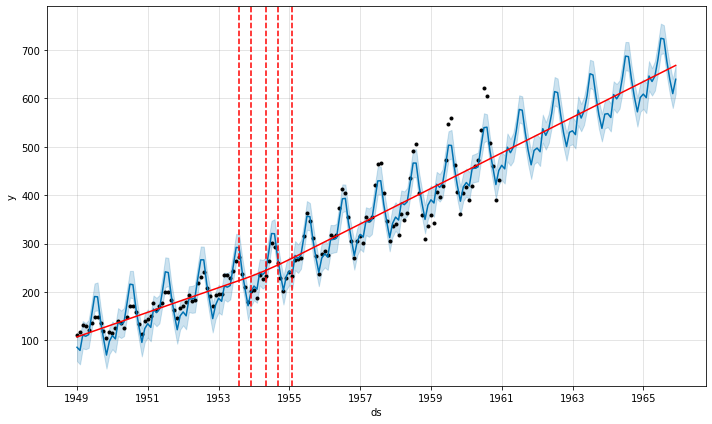

In [20]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)